## Keras를 이용한 RNN

In [1]:
from keras.models import Sequential # 모델을 만들때 기본적인 클래스
from keras.layers import Conv2D # CNN 2차원 사용
from keras.layers import MaxPooling2D # 합성곱에서 자르고 나서 데이터 선택 시 가장큰 값이 2차원
from keras.layers import Flatten # CNN(층으로 쌓은 것) 한것 을 한줄로 평평하게 만들겠다
from keras.layers import Dense,LSTM

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### input_shape
- 첫번째 레이어에 입력값 정의
- 이것은 shape 튜플(integer이나 None값, None값은 양의 정수 아무 값이나 가능함)을 인자값으로 받는다.
- input_shape에서 batch 차원은 포함하지 않는다. 

### batch_input_shape
- batch_input_shape는 input_shape에 batch_size를 추가한 것.
- 이것은 고정된 batch_size를 정의하기에 유용하다. 

###
- input_dim 일부 2차원 레이어에서 Dense와 같은 레이어에서 입력값에 대한 정의를 수행
- 그리고 3차원 레이어에서 여유의 레이어는 input_dim, input_length 두개의 입력값을 사용


In [2]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [4]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df.workclass = labelencoder.fit_transform(df.workclass)

In [6]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,4,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,0,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,4,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,4,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.income = df.income.map({'<=50K':1, '>50K':0})
df.head(10)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,4,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,0,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,4,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,4,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1
5,34,4,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,1
6,38,4,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,1
7,74,7,Doctorate,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,0
8,68,1,HS-grad,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,1
9,41,4,Some-college,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,0


In [8]:
import numpy as np

def seq2dataset(X, window_size):
    Xdata = []
    Ydata = []
    for i in range(len(X)- window_size):
        X_subset = X.workclass[i:(i+window_size)]
        Xdata.append(X_subset)
        
        Y_subset = X.income[i:(i+window_size)]
        Ydata.append(Y_subset)
        
    return np.array(Xdata), np.array(Ydata)

In [9]:
x_data, y_data = seq2dataset(df, 4)

In [53]:
print(x_data.shape)
print(x_data)

(32557, 4)
[[0 4 0 4]
 [4 0 4 4]
 [0 4 4 4]
 ...
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]]


In [11]:
print(y_data.shape)
print(y_data)

(32557, 4)
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [1 0 1 1]
 [0 1 1 0]
 [1 1 0 1]]


In [12]:
x_data.max()

8

In [102]:
from keras.utils import np_utils
import keras
x_train=x_data
y_train=y_data
max_idx_value=8 #df.workclass 개수가 8개 이당다앋아ㅏㅇ아아아아ㅏㅏ
x_train = x_train / float(max_idx_value)
# x_train = np_utils.to_categorical(x_train)
# y_train=np_utils.to_categorical(y_train) # shape 구조 때문에 fit 되지 않는다.
one_hot_vec_size = y_train.shape[1]
print('one hot encoding vector size is',one_hot_vec_size)
model= Sequential()
model.add(LSTM(128,input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(one_hot_vec_size,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 정답이 여러 개일때 categorical_crossentropy

one hot encoding vector size is 4


In [87]:
y_train[0], y_train.shape

(array([1, 1, 1, 1], dtype=int64), (32557, 4))

In [88]:
x_train[0], x_train.shape

(array([0. , 0.5, 0. , 0.5]), (32557, 4))

In [89]:
x_train[0:10]

array([[0.   , 0.5  , 0.   , 0.5  ],
       [0.5  , 0.   , 0.5  , 0.5  ],
       [0.   , 0.5  , 0.5  , 0.5  ],
       [0.5  , 0.5  , 0.5  , 0.5  ],
       [0.5  , 0.5  , 0.5  , 0.875],
       [0.5  , 0.5  , 0.875, 0.125],
       [0.5  , 0.875, 0.125, 0.5  ],
       [0.875, 0.125, 0.5  , 0.5  ],
       [0.125, 0.5  , 0.5  , 0.75 ],
       [0.5  , 0.5  , 0.75 , 0.5  ]])

In [90]:
x_data[:, 3], y_data[:, 3]

(array([4, 4, 4, ..., 4, 4, 4], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int64))

In [91]:
round(len(x_data)*0.8), round(len(y_data)*0.8)

(26046, 26046)

In [92]:
x_test1 = x_test[:round(len(x_data)*0.8)]
y_test1 = y_test[:round(len(x_data)*0.8)]

In [93]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

print("one hot encoding vector size is ", one_hot_vec_size)


history = LossHistory() 
history.init()

one hot encoding vector size is  4


In [94]:
y_train.shape

(32557, 4)

In [95]:
x_train.shape

(32557, 4)

Epoch 1/20
 - 11s - loss: 1.1219 - acc: 0.2408
Epoch 2/20
 - 10s - loss: 1.1218 - acc: 0.2408
Epoch 3/20
 - 12s - loss: 1.1217 - acc: 0.2408
Epoch 4/20
 - 12s - loss: 1.1217 - acc: 0.2408
Epoch 5/20
 - 11s - loss: 1.1217 - acc: 0.2408
Epoch 6/20
 - 12s - loss: 1.1217 - acc: 0.2408
Epoch 7/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 8/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 9/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 10/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 11/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 12/20
 - 13s - loss: 1.1216 - acc: 0.2408
Epoch 13/20
 - 12s - loss: 1.1216 - acc: 0.2408
Epoch 14/20
 - 12s - loss: 1.1215 - acc: 0.2408
Epoch 15/20
 - 15s - loss: 1.1215 - acc: 0.2408
Epoch 16/20
 - 17s - loss: 1.1215 - acc: 0.2408
Epoch 17/20
 - 14s - loss: 1.1215 - acc: 0.2408
Epoch 18/20
 - 14s - loss: 1.1215 - acc: 0.2408
Epoch 19/20
 - 13s - loss: 1.1215 - acc: 0.2408
Epoch 20/20
 - 13s - loss: 1.1215 - acc: 0.2408


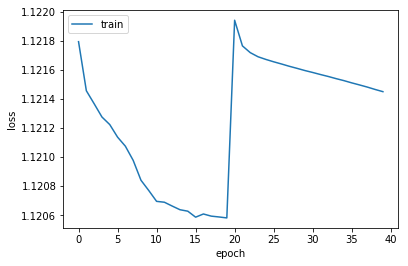

32557/32557 [==============================] - 1s 17us/step
acc: 24.08%


In [103]:
model.fit(x_train,y_train,epochs=20,batch_size=2,verbose=2,shuffle=False,callbacks=[history]) #shuffle 순서대로 실행

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [104]:
y_data

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [1, 0, 1, 1],
       [0, 1, 1, 0],
       [1, 1, 0, 1]], dtype=int64)

In [105]:
pred_out = model.predict(x_test)
pred_out

array([[0.259054  , 0.24168733, 0.25534654, 0.24391215],
       [0.24691546, 0.26324674, 0.24253388, 0.24730392],
       [0.2622582 , 0.2447327 , 0.24389613, 0.24911296],
       ...,
       [0.24536772, 0.24783269, 0.2437112 , 0.26308838],
       [0.24597137, 0.24649955, 0.26297396, 0.24455506],
       [0.24691546, 0.26324674, 0.24253388, 0.24730392]], dtype=float32)

In [181]:
print("one step prediction : ", pred_out)

print(pred_out == y_data).mean()

one step prediction :  [[0.27120745 0.2314387  0.266289   0.23106495]
 [0.23439774 0.27552712 0.2480302  0.24204491]
 [0.26729456 0.25377795 0.23753181 0.2413956 ]
 ...
 [0.24662875 0.24519607 0.23835851 0.26981667]
 [0.23949367 0.2408534  0.26661402 0.2530389 ]
 [0.23439774 0.27552712 0.2480302  0.24204491]]
False


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


AttributeError: 'NoneType' object has no attribute 'mean'

##Keras를 이용한 상태유지 LSTM

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [25]:
from keras.utils import np_utils
import keras

In [26]:
import numpy as np

def seq2dataset(seq, window_size):##어떤 역할을 하는지 생각해보기
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [27]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [28]:
x_train=dataset[:,0:4]
y_train=dataset[:,4]
max_idx_value=13

In [29]:
x_train = x_train / float(max_idx_value)

In [30]:
x_train = np.reshape(x_train,(50,4,1))

In [31]:
y_train=np_utils.to_categorical(y_train)

In [32]:
one_hot_vec_size=y_train.shape[1]

In [36]:
model = Sequential()
model.add(LSTM(128, batch_input_shape=(1,4,1), stateful=True))##batch_input_size (배치사이즈,타임스텝,속성)
model.add(Dense(one_hot_vec_size, activation='softmax'))

one hot encoding vector size is  12
epochs:0
Epoch 1/1
 - 0s - loss: 2.0580 - acc: 0.5200
epochs:1
Epoch 1/1
 - 0s - loss: 0.0322 - acc: 0.9800
epochs:2
Epoch 1/1
 - 0s - loss: 0.1516 - acc: 0.9200
epochs:3
Epoch 1/1
 - 0s - loss: 0.0551 - acc: 0.9600
epochs:4
Epoch 1/1
 - 0s - loss: 0.0184 - acc: 1.0000
epochs:5
Epoch 1/1
 - 0s - loss: 0.0107 - acc: 1.0000
epochs:6
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
epochs:7
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
epochs:8
Epoch 1/1
 - 0s - loss: 0.0042 - acc: 1.0000
epochs:9
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs:10
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
epochs:11
Epoch 1/1
 - 0s - loss: 0.1307 - acc: 0.9600
epochs:12
Epoch 1/1
 - 0s - loss: 0.5459 - acc: 0.8200
epochs:13
Epoch 1/1
 - 0s - loss: 0.1405 - acc: 0.9200
epochs:14
Epoch 1/1
 - 0s - loss: 0.2192 - acc: 0.9400
epochs:15
Epoch 1/1
 - 0s - loss: 0.1689 - acc: 0.9400
epochs:16
Epoch 1/1
 - 0s - loss: 0.3384 - acc: 0.9200
epochs:17
Epoch 1/1
 - 0s - loss: 0.335

 - 0s - loss: 0.0027 - acc: 1.0000
epochs:148
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs:149
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs:150
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs:151
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs:152
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs:153
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs:154
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs:155
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs:156
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs:157
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs:158
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs:159
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs:160
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs:161
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs:162
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs:163
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs:164
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs:165
Ep

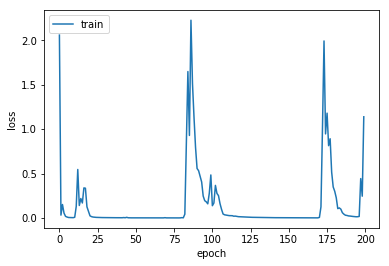

50/50 [==============================] - 0s 2ms/step
acc: 68.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd8', 'd8', 'd8', 'g8', 'e8', 'e8', 'e4', 'g8', 'e8', 'e4', 'e8', 'f8', 'g4', 'g4', 'g8', 'e8', 'e4', 'd8', 'e8', 'd4', 'd8', 'd4', 'e8', 'd8', 'g8', 'e8', 'd8', 'd4', 'd4', 'e8', 'e4', 'd8', 'd8', 'd4', 'g4', 'd4', 'e8', 'e4', 'c8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'd8', 'e8', 'e4', 'e8', 'd8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8']


In [40]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

print("one hot encoding vector size is ", one_hot_vec_size)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() 
history.init()

num_epoch=200

for epoch_idx in range(num_epoch):
    print('epochs:'+str(epoch_idx))
    model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2,shuffle=False,callbacks=[history])
    model.reset_states()##상태 초기화에 대한 코드

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

scores = model.evaluate(x_train, y_train,batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


pred_count = 50 # 최대 예측 개수 정의


seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train,batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4,1)) # 샘플수,타임스템수,속성수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)